In [1]:
# import dependencies 
# clean data 
# - remove punktuation
# - tokenize data
# - lowercase data 
# - remove stop words
# - Lemmatization
# - join tokens back into strings 
# label encoding
# split data 
# Make Bag of Words 
# make a model 
# evaluate 
# save 

In [1]:
import pandas as pd 
import numpy as np 

In [42]:
# load the dataset
directory = 'Kozminski_AI_chat/Word_embeddings/data_reduced/subjects_data_cleaned.csv' 
df = pd.read_csv(directory)
del df['Unnamed: 0']
df.head(10)

,Category,Question
0,Educational resources,librarys open hours
1,Educational resources,access librarys resources remotely
2,Educational resources,library regulations borrow book
3,Educational resources,renew borrow book
4,Educational resources,fin late return library materials
5,Educational resources,request book another library interlibrary loan
6,Educational resources,type databases available students kozminski un...
7,Educational resources,access online databases offcampus
8,Educational resources,process request article online database
9,Educational resources,workshops train sessions use library resources


In [43]:
# remove punctuation
import string

def remove_punct(index, line):
    
    line_no_punct = line.translate(str.maketrans("", "", string.punctuation))
    df.loc[index, 'Question'] = line_no_punct

for index, line in df.iterrows():
    remove_punct(index, line[1])

df.head(10)
    

,Category,Question
0,Educational resources,librarys open hours
1,Educational resources,access librarys resources remotely
2,Educational resources,library regulations borrow book
3,Educational resources,renew borrow book
4,Educational resources,fin late return library materials
5,Educational resources,request book another library interlibrary loan
6,Educational resources,type databases available students kozminski un...
7,Educational resources,access online databases offcampus
8,Educational resources,process request article online database
9,Educational resources,workshops train sessions use library resources


In [44]:
# tokenization 
from nltk.tokenize import word_tokenize
def tokenize_text(index, line):
    word_tokens = word_tokenize(line)
    df.loc[index, 'Question'] = word_tokens

for index, line in df.iterrows():
    tokenize_text(index, line[1])

df.head(10)

,Category,Question
0,Educational resources,"[librarys, open, hours]"
1,Educational resources,"[access, librarys, resources, remotely]"
2,Educational resources,"[library, regulations, borrow, book]"
3,Educational resources,"[renew, borrow, book]"
4,Educational resources,"[fin, late, return, library, materials]"
5,Educational resources,"[request, book, another, library, interlibrary..."
6,Educational resources,"[type, databases, available, students, kozmins..."
7,Educational resources,"[access, online, databases, offcampus]"
8,Educational resources,"[process, request, article, online, database]"
9,Educational resources,"[workshops, train, sessions, use, library, res..."


In [45]:
# lowercase data 
def lowercase_text(index, line):
    new_line = [word.lower() for word in line]
    df.loc[index, 'Question'] = new_line

for index, line in df.iterrows():
    lowercase_text(index, line[1])

df.head(10)

,Category,Question
0,Educational resources,"[librarys, open, hours]"
1,Educational resources,"[access, librarys, resources, remotely]"
2,Educational resources,"[library, regulations, borrow, book]"
3,Educational resources,"[renew, borrow, book]"
4,Educational resources,"[fin, late, return, library, materials]"
5,Educational resources,"[request, book, another, library, interlibrary..."
6,Educational resources,"[type, databases, available, students, kozmins..."
7,Educational resources,"[access, online, databases, offcampus]"
8,Educational resources,"[process, request, article, online, database]"
9,Educational resources,"[workshops, train, sessions, use, library, res..."


In [46]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

def remove_stop_words(index, line):
 
    stop_words = set(stopwords.words('english'))
    new_sentence = [w for w in line if not w.lower() in stop_words]
    df.loc[index, 'Question'] = new_sentence
   
for index, line in df.iterrows():
    remove_stop_words(index, line[1])
    

df.head(10)

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Question
0,Educational resources,"[librarys, open, hours]"
1,Educational resources,"[access, librarys, resources, remotely]"
2,Educational resources,"[library, regulations, borrow, book]"
3,Educational resources,"[renew, borrow, book]"
4,Educational resources,"[fin, late, return, library, materials]"
5,Educational resources,"[request, book, another, library, interlibrary..."
6,Educational resources,"[type, databases, available, students, kozmins..."
7,Educational resources,"[access, online, databases, offcampus]"
8,Educational resources,"[process, request, article, online, database]"
9,Educational resources,"[workshops, train, sessions, use, library, res..."


In [47]:
# Lemmitization
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize wordnet lemmatizer
wnl = WordNetLemmatizer()

def lemitization(index, sentence):

    new_sentence = []
    for word in sentence:
        word = wnl.lemmatize(word, pos="v")
        new_sentence.append(word)
    df.loc[index, 'Question'] = new_sentence

for index, line in df.iterrows():
    lemitization(index, line[1])

df.head(10)

[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/apple/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Category,Question
0,Educational resources,"[librarys, open, hours]"
1,Educational resources,"[access, librarys, resources, remotely]"
2,Educational resources,"[library, regulations, borrow, book]"
3,Educational resources,"[renew, borrow, book]"
4,Educational resources,"[fin, late, return, library, materials]"
5,Educational resources,"[request, book, another, library, interlibrary..."
6,Educational resources,"[type, databases, available, students, kozmins..."
7,Educational resources,"[access, online, databases, offcampus]"
8,Educational resources,"[process, request, article, online, database]"
9,Educational resources,"[workshops, train, sessions, use, library, res..."


In [48]:
# Join the tokens back into a string

def join_tokens(index, line):
    processed_text = ' '.join(line)
    df.loc[index, 'Question'] = processed_text

for index, line in df.iterrows():
    join_tokens(index, line[1])

df.head(10)


,Category,Question
0,Educational resources,librarys open hours
1,Educational resources,access librarys resources remotely
2,Educational resources,library regulations borrow book
3,Educational resources,renew borrow book
4,Educational resources,fin late return library materials
5,Educational resources,request book another library interlibrary loan
6,Educational resources,type databases available students kozminski un...
7,Educational resources,access online databases offcampus
8,Educational resources,process request article online database
9,Educational resources,workshops train sessions use library resources


In [84]:
# label encoding
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
y_data = label_encoder.fit_transform(df['Category'])
df['Encoded_labels'] = y_data
list_of_labels = df['Category'].unique()
list_of_encoded_labels = df['Encoded_labels'].unique()
print(list_of_encoded_labels, list_of_labels)


[ 4  6  1  7  8  5  0 10  3  2  9] ['Educational resources' 'Open Days' 'Campus' 'Programmes and Degrees'
 'Scholarship\xa0' 'Internship' 'Admissions and Application Process'
 'Study and Internship abroad' 'Double Degree programs' 'Contacts'
 'Student Housing']


In [68]:
# Make Bag of Words 

from sklearn.feature_extraction.text import CountVectorizer
import pickle

cv = CountVectorizer()
X_train_cv = cv.fit_transform(df['Question'])

# save Count Vectoriser 
with open('vectors/vectors.txt', 'wb') as f:
    pickle.dump(cv, f)

X_train_cv.shape



(4164, 1751)

In [88]:
# Split data
from sklearn.model_selection import train_test_split

x_data = X_train_cv
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=123)

# Convert sparse matrix to dense format
X_train = X_train.toarray()
X_test = X_test.toarray()


print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (3123, 1751)
Testing Data :  (1041, 1751)


In [70]:
y_train

array([2, 5, 7, ..., 8, 2, 2])

In [71]:
# Build the model 

import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define the number of classes (60 in your case)
num_classes = 11

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(1751,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [72]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
98/98 [==============================] - 2s 14ms/step - loss: 1.3971 - accuracy: 0.7800 - val_loss: 0.5069 - val_accuracy: 0.9126
Epoch 2/10
98/98 [==============================] - 1s 10ms/step - loss: 0.2694 - accuracy: 0.9526 - val_loss: 0.2461 - val_accuracy: 0.9452
Epoch 3/10
98/98 [==============================] - 1s 11ms/step - loss: 0.1172 - accuracy: 0.9769 - val_loss: 0.2025 - val_accuracy: 0.9500
Epoch 4/10
98/98 [==============================] - 1s 12ms/step - loss: 0.0734 - accuracy: 0.9846 - val_loss: 0.1927 - val_accuracy: 0.9491
Epoch 5/10
98/98 [==============================] - 1s 13ms/step - loss: 0.0479 - accuracy: 0.9914 - val_loss: 0.1896 - val_accuracy: 0.9491
Epoch 6/10
98/98 [==============================] - 1s 11ms/step - loss: 0.0366 - accuracy: 0.9920 - val_loss: 0.1907 - val_accuracy: 0.9510
Epoch 7/10
98/98 [==============================] - 1s 11ms/step - loss: 0.0281 - accuracy: 0.9942 - val_loss: 0.1957 - val_accuracy: 0.9500
Epoch 8/10
98

In [74]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_acc:.4f}")


33/33 [==============================] - 0s 3ms/step - loss: 0.2037 - accuracy: 0.9491
Validation Accuracy: 0.9491


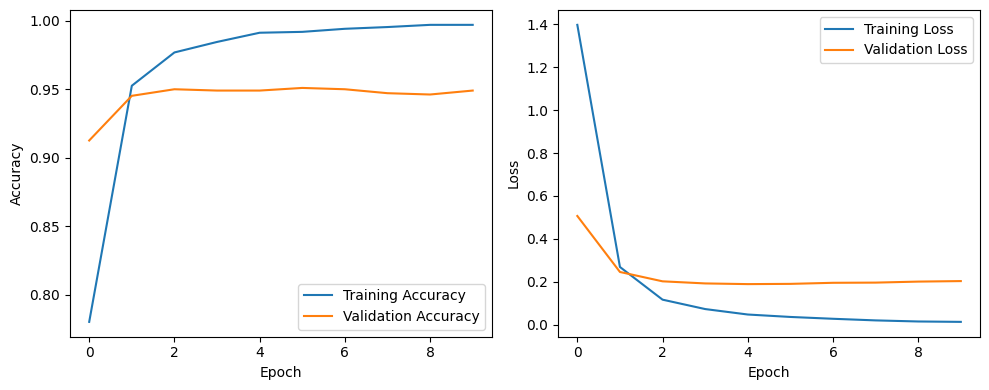

In [75]:
# Plot accuracy and loss during training
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
model.save("reduced_data_BOW.h5")